# Trabalho 02 - KNN

#### Marrielly Chrystina Martines



O objetivo desta tarefa é explorar o conjunto de dados "*water_potability_nonans.csv*", que contém medidas físico-químicos de 2011 amostras de água, e implementar um sistema de classificação usando o classificador KNN, que irá categorizar a amostra como sendo **potável** ou **não potável**. Será empregada a técnica PCA para reduzir a dimensionalidade do conjunto de dados e o desempenho do classificador KNN será avaliado por meio de validação cruzada em dois níveis.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('water_potability_nonans.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


## Estatísticas Descritivas

Para dar sequência ao processamento dos dados, é fundamental aplicar a técnica de estatística descritiva para analisar e compreender as informações de entrada. Essa técnica engloba o cálculo de medidas de centralidade, tais como a média e a mediana, e medidas de dispersão, como o desvio padrão e a variância, que são cruciais para entender a distribuição dos dados e identificar valores discrepantes ou *outliers*.

In [ ]:
pd.set_option("display.max_columns", None)
df.groupby('Potability').describe()

ph                                                    \
             count      mean       std       min       25%       50%   
Potability                                                             
0           1200.0  7.067201  1.659106  1.431782  5.982888  6.992004   
1            811.0  7.113791  1.437623  0.227499  6.256039  7.046549   

                                Hardness                                    \
                 75%        max    count        mean        std        min   
Potability                                                                   
0           8.141979  14.000000   1200.0  196.008440  30.717642  98.452931   
1           7.955161  11.898078    811.0  195.908341  35.301146  73.492234   

                                                            Solids  \
                   25%         50%         75%         max   count   
Potability                                                           
0           177.313440  196.799368  214.532109  300.292476  1200.0   
1           174.380497  197.617494  218.414531  317.338124   811.0   

                                                                  \
                    mean          std          min           25%   
Potability                                                         
0           21628.535122  8461.108693   320.942611  15378.907323   
1           22344.922883  8891.547966  1198.943699  15816.076607   

                                                     Chloramines            \
                     50%           75%           max       count      mean   
Potability                                                                   
0           20507.399647  26786.546213  55334.702799      1200.0  7.107267   
1           21217.158596  27696.134419  56488.672413       811.0  7.174395   

                                                                         \
                 std       min       25%       50%       75%        max   
Potability                                                                
0           1.476577  2.456014  6.169384  7.103718  8.076759  12.653362   
1           1.732796  1.390871  6.106169  7.212254  8.181431  13.127000   

           Sulfate                                                             \
             count        mean        std         min         25%         50%   
Potability                                                                      
0           1200.0  333.742928  36.398403  203.444521  310.653441  332.615625   
1            811.0  332.457832  47.446190  129.000000  301.768819  331.087177   

                                   Conductivity                         \
                   75%         max        count        mean        std   
Potability                                                               
0           356.432048  460.107069       1200.0  427.554342  79.882677   
1           365.632984  481.030642        811.0  425.005423  81.950982   

                                                                        \
                   min         25%         50%         75%         max   
Potability                                                               
0           210.319182  369.580980  424.479471  482.333786  753.342620   
1           201.619737  360.275012  421.099917  482.296528  695.369528   

           Organic_carbon                                            \
                    count       mean       std       min        25%   
Potability                                                            
0                  1200.0  14.400250  3.370196  4.371899  12.118659   
1                   811.0  14.294764  3.257917  2.200000  12.148355   

                                            Trihalomethanes             \
                  50%        75%        max           count       mean   
Potability                                                               
0           14.351828  16.787531  27.006707          1200.0  66.278712   
1    

É possível notar que os dados não estão normalizados, o que poderá criar um certo viés nos atributos que possuem valores absolutos em uma escala maior. Além disso, há um número grande de dimensões no dataset, o que compromete a separabilidade.

## Histogramas

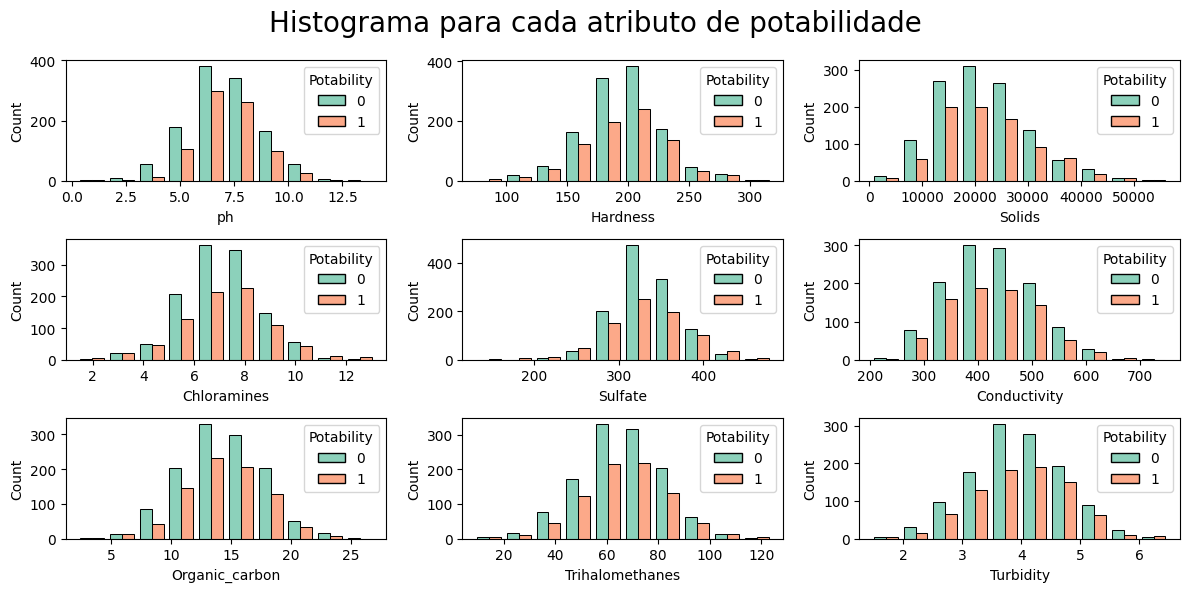

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,6))
fig.suptitle('Histograma para cada atributo de potabilidade', fontsize=20)

sns.histplot(data=df, bins=10, x='ph', hue='Potability', multiple='dodge', shrink=0.8, ax=axes[0][0], palette='Set2')
sns.histplot(data=df, bins=10, x='Hardness', hue='Potability', multiple='dodge', shrink=0.8, ax=axes[0][1], palette='Set2')
sns.histplot(data=df, bins=10, x='Solids', hue='Potability', multiple='dodge', shrink=0.8, ax=axes[0][2], palette='Set2')
sns.histplot(data=df, bins=10, x='Chloramines', hue='Potability', multiple='dodge', shrink=0.8, ax=axes[1][0], palette='Set2')
sns.histplot(data=df, bins=10, x='Sulfate', hue='Potability', multiple='dodge', shrink=0.8, ax=axes[1][1], palette='Set2')
sns.histplot(data=df, bins=10, x='Conductivity', hue='Potability', multiple='dodge', shrink=0.8, ax=axes[1][2], palette='Set2')
sns.histplot(data=df, bins=10, x='Organic_carbon', hue='Potability', multiple='dodge', shrink=0.8, ax=axes[2][0], palette='Set2')
sns.histplot(data=df, bins=10, x='Trihalomethanes', hue='Potability', multiple='dodge', shrink=0.8, ax=axes[2][1], palette='Set2')
sns.histplot(data=df, bins=10, x='Turbidity', hue='Potability', multiple='dodge', shrink=0.8, ax=axes[2][2], palette='Set2')

fig.tight_layout()

Os histogramas de cada atributo utilizado na definição de potabilidade estão apresentados acima. A ideia é verificar a separabilidade do dataset e, ao que parece, nenhum atributo é adequado para classificar com precisão a classe de potabilidade ('**Potability**'). 

Sendo assim, será feita a verificação das classes usando uma combinação de dois atributos através do *pairplot*.

## Pairplot

In [ ]:
sns.pairplot(data=df, hue='Potability', diag_kind='hist', palette='Set2')

Output hidden; open in https://colab.research.google.com to view.

Observa-se que a diferença de escala dos atributos ainda afeta a definição de um conjunto de atributos que possa ser utilizado para a segregação da classe de potabilidade. Abaixo, será realizado a normalização dos dados.

## Normalização dos Dados

In [ ]:
x = df.loc[:, df.columns != 'Potability']
y = df['Potability']
y_values = df['Potability'].values
columns = df.columns

ss = StandardScaler()
ss.fit(x)

x_ss = ss.transform(x)
x_ss = pd.DataFrame(np.hstack((x_ss, df['Potability'].values.reshape((-1,1)))), columns=columns)

df_ss = x_ss
df_ss['Potability'] = y_values
df_ss

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.782466,0.564114,0.011687,0.583804,0.574378,-0.783962,1.227032,2.111652,0.844761,0
1,1.275463,-0.455653,-0.455835,-0.370947,-0.560480,-0.348429,-0.842154,-2.140399,0.135033,0
2,-0.954835,-0.234614,0.790645,0.259104,-0.158911,-1.810063,-1.792340,-0.714423,-1.807366,0
3,1.994902,1.596951,0.790764,0.239248,1.467140,-1.770608,-0.170876,1.132494,-1.662163,0
4,0.985323,0.226606,-0.954313,-1.622878,-0.726179,0.595858,-0.599824,-0.224135,0.553348,0
...,...,...,...,...,...,...,...,...,...,...
2006,1.210411,0.584770,-0.693978,-0.528284,-0.492625,-0.447578,-1.341281,-0.705001,0.825626,1
2007,-0.243774,0.347964,-0.540564,0.362137,-0.697038,-1.205321,0.559422,-2.334474,-0.675183,1
2008,2.800492,-3.100365,1.767503,1.343596,-1.803476,0.165656,0.546021,-1.545585,0.512125,1
2009,-0.646160,-0.285317,0.488576,0.387023,0.302843,-0.131852,-0.688929,-0.372108,-0.384562,1


Porém isso não é o suficiente, a grande dimensionalidade do dataset continua afetando a separabilidade. Por isso, será utilizado o PCA (*Principal Component Analysis*) para reduzir a dimensionalidade linear dos dados e projetá-los em um espaço dimensional inferior, no caso em 2 dimensões.

## PCA

In [ ]:
pca_ss = PCA(n_components=2)

x_df = x_ss.loc[:, x_ss.columns != 'Potability']
x_df

pca_ss.fit(x_df)

x_ss_pca = pca_ss.transform(x_df)
x_ss_pca_df = pd.DataFrame(x_ss_pca, columns=['PC 0', 'PC 1'])
x_ss_pca_df.head()

,PC 0,PC 1
0,-0.892775,-0.120349
1,-0.254284,-0.283669
2,1.052120,0.521765
3,-1.806796,-1.101505
4,-0.487809,-1.111868


In [ ]:
print("Instâncias originais: %s\nInstâncias projetadas nos componentes principais: %s" % (str(df.shape), str(x_ss_pca_df.shape)))

Instâncias originais: (2011, 10)
Instâncias projetadas nos componentes principais: (2011, 2)


No scatterplot abaixo, é possível visualizar a distribuição das classes após a redução de dimensionalidade:

<Axes: xlabel='PC 0', ylabel='PC 1'>

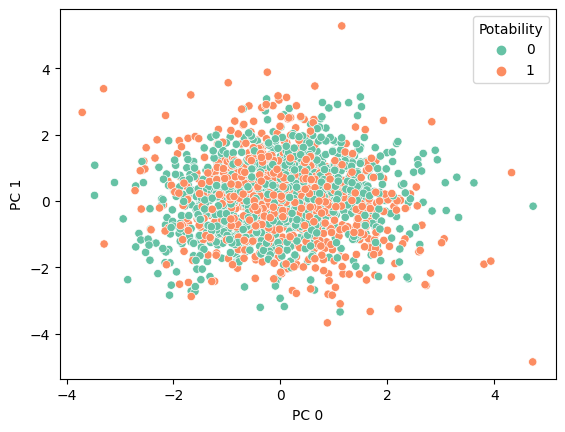

In [ ]:
sns.scatterplot(data=x_ss_pca_df, x='PC 0', y='PC 1', hue=df['Potability'], palette='Set2')

Para determinar a relevância das características na transformação PCA, é possível analisar os componentes principais que foram gerados a partir dos dados originais. Para melhor visualizaçao, abaixo é apresentado um scatterplot mostrando as diferenças entre '**PC 0**' e '**PC 1**'.

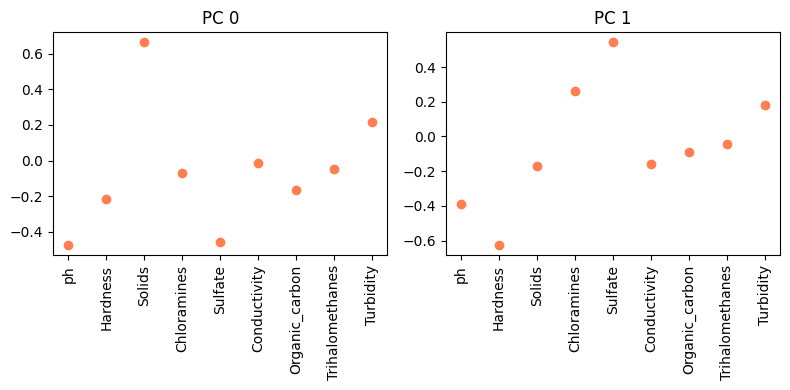

In [ ]:
fig, ax = plt.subplots(figsize=(8,4), nrows=1, ncols=2)

for idx, pc in enumerate(pca_ss.components_):
    ax[idx].scatter(np.arange(len(x.columns)), pc, c="coral")
    ax[idx].set_xticks(np.arange(len(x.columns)))
    ax[idx].set_xticklabels(x.columns, rotation=90)
    ax[idx].set_title('PC %d' % (idx))

fig.tight_layout()

## KNN com Validação em 2 Níveis

Com os dados normalizados e reduzidos a 2 dimensões, é possível calcular o KNN. A ideia do algoritmo KNN é que instâncias com características parecidas têm mais chances de serem classificadas na mesma categoria, fazendo uso de uma métrica de similaridade que indique o grau de semelhança (ou diferença) entre pares de instâncias, como a distância euclidiana.

Para avaliar o modelos de aprendizagem de máquina, será utilizado a validação cruzada. Neste caso, tem-se 10 folds para o primeiro nível e 5 folds para o segundo nível. No primeiro nível, o conjunto de dados é dividido em 10 partes, sendo 1 parte usada para teste e as outras partes para treinamento, repetindo o processo 10 vezes. No segundo nível, o mesmo processo é aplicado, mas com 5 folds no conjunto de treinamento e validação.

In [ ]:
k1 = 10   #controla o número de vias da validação cruzada para estimar o desempenho do modelo
k2 = 5    #controla o número de vida da validação cruzada para otimização de hiperparametros

#usa o protocolo de validação cruzada estratificada
skf = StratifiedKFold(n_splits=k1, shuffle=True, random_state=1)

acuracias = []

#a função split retorna os índices das instâncias que devem ser usadas para o treinamento e o teste.
for idx_treino, idx_teste in skf.split(x, y):
    
    #extrai as instâncias de treinamento de acordo com os índices fornecidos pelo skf.split
    x_treino = x[idx_treino]
    y_treino = y[idx_treino]
    
    #extrai as instâncias de teste de acordo com os índices fornecidos pelo skf.split
    x_teste = x[idx_teste]
    y_teste = y[idx_teste]
    
    #coloca todas as variáveis na mesma escala, usando o conjunto de treinamento para calcular os parâmetros da escala
    ss = StandardScaler()
    ss.fit(x_treino)
    x_treino = ss.transform(x_treino)
    x_teste = ss.transform(x_teste)
    
    #combinações de parâmetros otimizados, otimizando o número de vizinhos mais próximos para o knn (k)
    params = {'n_neighbors' : range(1,30,2)}
    #instancia um KNN com parâmetros padrão
    knn = KNeighborsClassifier()
    #instancia um GridSearchCV com k2 vias.
    knn = GridSearchCV(knn, params, cv=StratifiedKFold(n_splits=k2))    #busca exaustiva para otimização de hiperparâmetro por validação cruzada
    #realiza a otimização dos hiperparâmetros e treina o modelo final com a melhor combinação de hiperparâmetros com todos os dados de treinamento
    knn.fit(x_treino, y_treino)
    
    #calcula a acurácia no conjunto de testes desta iteração e salva na lista.
    acuracias.append(accuracy_score(y_teste, knn.predict(x_teste)))
    
#calcula as estatísticas da validação cruzada, que nos dá uma confiança que, na média, este é o desempenho esperado do classificador no mundo real
print(' Acurácia Máxima: %.3f\n Acurácia Mínima: %.3f' % ( max(acuracias), min(acuracias)))
print(' Acurácia Média: %.3f\n Desvio Padrão: %.3f \n' % (np.mean(acuracias), np.std(acuracias)))

 Acurácia Máxima: 0.667
 Acurácia Mínima: 0.627
 Acurácia Média: 0.647
 Desvio Padrão: 0.012 

